In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns; sns.set()

In [2]:
df_school= pd.read_csv('demodata20201118.csv')

# comparing the SCORE from START date to RECENT SCORE

In [3]:
df_school.head(3)

,Username,First Name,Last Name,School Name,Grade Level,Class Name,Test1_Date,Test1_CompScore,mostRecentCompScore,HoursUsed
0,100204,Gina,Hooper,Schmitt High School,9,Rivera - Period 7,8/5/2020,6.0,6.0,11.445556
1,100205,Dane,Bates,Schmitt High School,9,Davila - Period 7,8/5/2020,6.0,6.0,10.396944
2,100206,Autumn,Flowers,Cherry Early College High School,9,Acosta - Period 1,8/5/2020,3.0,6.0,13.669722


In [4]:
df_school.describe()

,Username,Grade Level,Test1_CompScore,mostRecentCompScore,HoursUsed
count,1000.000000,1000.000000,764.000000,803.000000,803.000000
mean,177261.269000,9.756000,5.543194,5.976339,10.243989
std,77093.772978,0.977456,3.078606,2.908529,7.833847
min,100005.000000,9.000000,0.000000,0.000000,0.352500
25%,100844.750000,9.000000,4.000000,4.000000,4.124028
50%,200661.000000,9.000000,6.000000,6.000000,8.620556
75%,204134.250000,10.000000,8.000000,8.000000,14.396528
max,316485.000000,12.000000,11.000000,12.000000,63.882222


# MISSING VALUES

In [5]:
df_school.isnull().sum()

Username                 0
First Name               0
Last Name                0
School Name              0
Grade Level              0
Class Name               0
Test1_Date             236
Test1_CompScore        236
mostRecentCompScore    197
HoursUsed              197
dtype: int64

In [6]:
# Checking If the TEST_1 DATE and TEST1 SCORE is NULL as well
df_school['Test1_CompScore'][df_school['mostRecentCompScore'].isnull()].count()

0

In [7]:
df_total_score= df_school[(df_school['mostRecentCompScore'].notnull()) & df_school['Test1_CompScore'].notnull()]

In [8]:
df_score=df_total_score[:350]

# DF with NO NULL VALUES on compscore and test score

In [9]:
df_score.isnull().sum()

Username               0
First Name             0
Last Name              0
School Name            0
Grade Level            0
Class Name             0
Test1_Date             0
Test1_CompScore        0
mostRecentCompScore    0
HoursUsed              0
dtype: int64

In [10]:
#plt.plot(data= df_score, x=np.arange(0, len(df_score.Username)), y= "Test1_CompScore", color='b')
#sns.scatterplot(data= df_score, x=np.arange(0, len(df_score.Username)), y= "Test1_CompScore", color='black')

#sns.lineplot(data= df_score, x=np.arange(0, len(df_score.Username)), y= "mostRecentCompScore", color='r')
#sns.scatterplot(data= df_score, x=np.arange(0, len(df_score.Username)), y= "mostRecentCompScore", color='black')

#plt.gcf().set_size_inches(12,7)

# PIE Chart to schow SCOREs

In [11]:
df_school.Test1_CompScore.unique()

array([ 6.,  3.,  9.,  4.,  2.,  5.,  7.,  8., 10.,  0.,  1., 11., nan])

# MEASUREMENT based on GRADE LEVEL

# GRADE lv= 9

In [12]:
df_school[['Test1_CompScore','mostRecentCompScore']][df_school['Grade Level'] == 9].describe()

,Test1_CompScore,mostRecentCompScore
count,399.000000,419.000000
mean,5.025063,5.460621
std,3.061246,2.829315
min,0.000000,0.000000
25%,2.000000,4.000000
50%,6.000000,6.000000
75%,8.000000,8.000000
max,10.000000,11.000000


# GRADE lv= 10

In [13]:
df_school[['Test1_CompScore','mostRecentCompScore']][df_school['Grade Level'] == 10].describe()

,Test1_CompScore,mostRecentCompScore
count,205.000000,213.000000
mean,6.126829,6.582160
std,2.967720,2.793027
min,0.000000,0.000000
25%,4.000000,5.000000
50%,6.000000,7.000000
75%,8.000000,9.000000
max,11.000000,12.000000


# GRADE lv= 11

In [14]:
df_school[['Test1_CompScore','mostRecentCompScore']][df_school['Grade Level'] == 11].describe()

,Test1_CompScore,mostRecentCompScore
count,86.000000,96.000000
mean,5.604651,5.989583
std,3.265791,3.226518
min,0.000000,0.000000
25%,3.250000,4.000000
50%,6.000000,7.000000
75%,8.000000,8.000000
max,11.000000,11.000000


# GRADE lv= 12

In [15]:
df_school[['Test1_CompScore','mostRecentCompScore']][df_school['Grade Level'] == 12].describe()

,Test1_CompScore,mostRecentCompScore
count,74.000000,75.000000
mean,6.648649,7.120000
std,2.696687,2.619882
min,0.000000,0.000000
25%,4.500000,6.000000
50%,8.000000,8.000000
75%,8.000000,9.000000
max,11.000000,12.000000


In [33]:
# SELECTING records where TEST1 DATE is not NULL

df_grade_lv= df_school[df_school['Test1_Date'].notnull()]

# BOX PLOT 

# FIRST TEST score by Grade Level

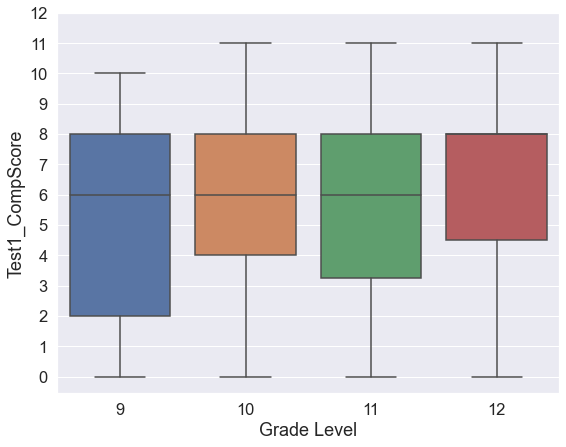

In [34]:
sns.set(font_scale=1.5)
sns.boxplot(x= df_grade_lv['Grade Level'], y=df_grade_lv['Test1_CompScore'], data=df_grade_lv) 
plt.gcf().set_size_inches(9,7)
plt.yticks(np.arange(0,13, 1));

# Most RECENT TEST SCORES by Grade Level

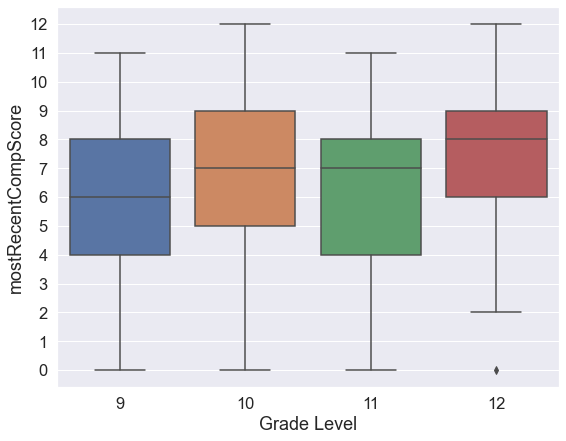

In [35]:
sns.set(font_scale=1.5)
sns.boxplot(x= df_grade_lv['Grade Level'], y=df_grade_lv['mostRecentCompScore'], data=df_grade_lv) 
plt.gcf().set_size_inches(9,7)

plt.yticks(np.arange(0,13, 1));

# USING Label Encoder to ENCODE the school NAMES

In [18]:
df_school['School Name'].unique()

array(['Schmitt High School', 'Cherry Early College High School',
       'Freeman Career Technical School', 'Brooks High School',
       'Jacobs High School', 'Douglas High School',
       'Foley Arts Focus High School', 'Lawson High School'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le= LabelEncoder()

In [37]:
df_school_name= df_grade_lv.drop(columns=['First Name', 'Last Name'])

In [38]:
school_names= le.fit_transform(df_school_name['School Name'])
df_school_name['School Name Code']= school_names

In [39]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df_school_name= df_school.drop(columns=['First Name', 'Last Name'])
school_names= le.fit_transform(df_school_name['School Name'])
df_school_name['School Name Code']= school_names

In [40]:
# NEW DF with SCHOOL CODE
df_school_name['School Name'][df_school_name['School Name Code' ].values == 7]

0      Schmitt High School
1      Schmitt High School
4      Schmitt High School
15     Schmitt High School
16     Schmitt High School
              ...         
971    Schmitt High School
975    Schmitt High School
977    Schmitt High School
979    Schmitt High School
984    Schmitt High School
Name: School Name, Length: 133, dtype: object

# CHECKING : 
- if there are any co-relationship between SCHOOL and the scores

In [41]:
first_score= df_school_name.corr(method= 'pearson')['Test1_CompScore']
first_score

Username               0.009547
Grade Level            0.161792
Test1_CompScore        1.000000
mostRecentCompScore    0.965495
HoursUsed             -0.049124
School Name Code       0.036118
Name: Test1_CompScore, dtype: float64

# RESULT: After checking the co-relationship result. 
- No strong co-relationship between School Name and Test1 CompScore was found

# Frist Test-1 CompScore by different Schools

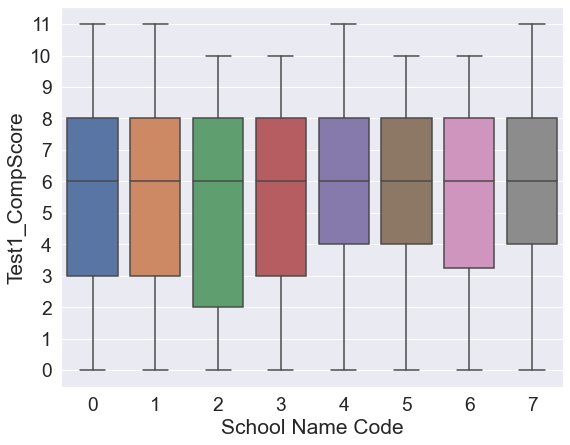

In [42]:

sns.set(font_scale= 1.75)
sns.boxplot(x= df_school_name['School Name Code'], y= df_school_name['Test1_CompScore'], data= df_school_name)
plt.gcf().set_size_inches(9,7)
plt.yticks(np.arange(0, 12,1));

# Most Recent CompScore by different Schools

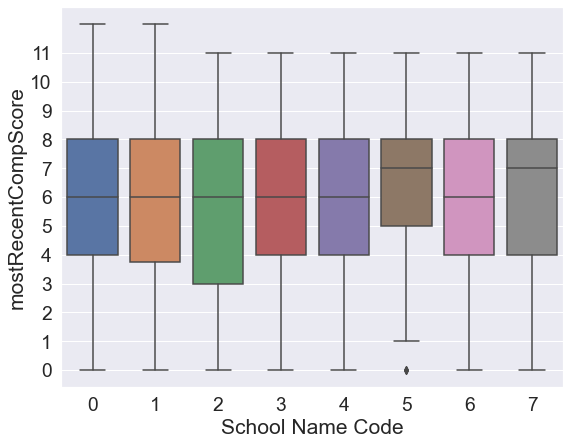

In [43]:
sns.set(font_scale= 1.75)
sns.boxplot(x= df_school_name['School Name Code'], y= df_school_name['mostRecentCompScore'], data= df_school_name)
plt.gcf().set_size_inches(9,7)
plt.yticks(np.arange(0, 12,1));

# CHECKING THE distribution of FIRST COMP SCORE

C:\Users\daiko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


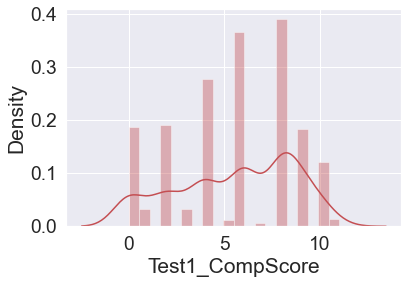

In [44]:
sns.distplot(df_school['Test1_CompScore'], color='r', bins=20);

# CHECKING THE distribution of RECENT COMP SCORE

C:\Users\daiko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


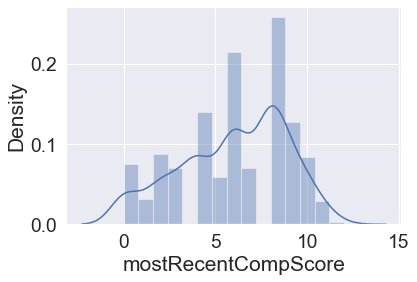

In [29]:
sns.distplot(df_school['mostRecentCompScore'], color='b', bins=15);

# Distribution of HOURS SOFTWARE USED

C:\Users\daiko\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


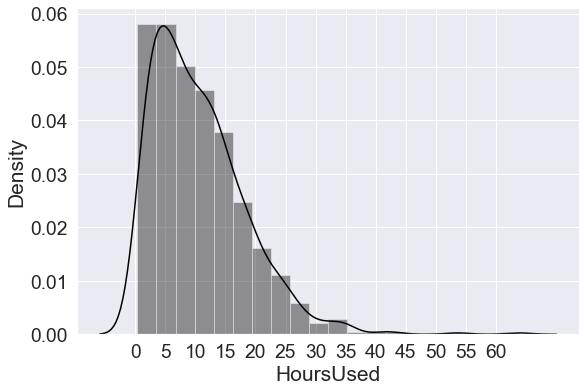

In [45]:
sns.set(font_scale=1.75)
sns.distplot(df_grade_lv['HoursUsed'], color='black', bins=20)
plt.gcf().set_size_inches(9,6)
plt.xticks(np.arange(0, 65,5));

# SOFTWARE USAGE by VIOLIN PLOT

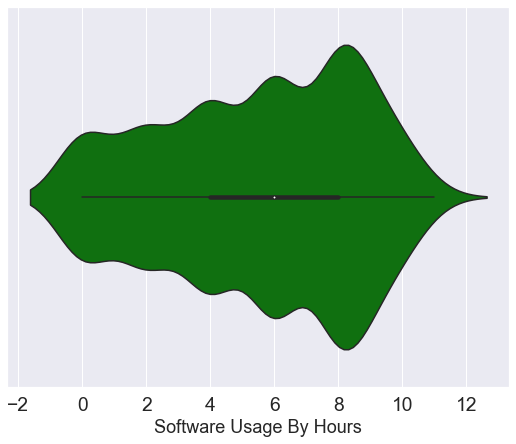

In [46]:
sns.violinplot(x=df_grade_lv['Test1_CompScore'], color='green')
plt.xlabel('Software Usage By Hours', fontsize=18)
plt.gcf().set_size_inches(9,7);

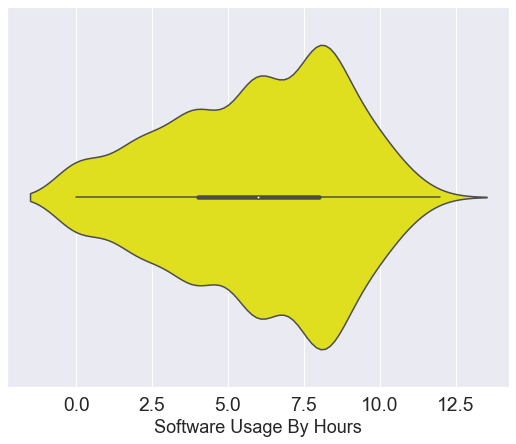

In [47]:
sns.violinplot(x=df_grade_lv['mostRecentCompScore'], color='yellow')
plt.xlabel('Software Usage By Hours', fontsize=18)
plt.gcf().set_size_inches(9,7);

# STUDENTS Recent Comp Score WHO HAVE USE SOFTWARE less than 5 hours